# Задача регрессии для предсказания времени для обучения работников (целевой показатель=количество часов в год)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('employee_survey.csv', sep=",")
# Просмотр датасета
#display(df)
df.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,...,4.9,Car,20,0,7,0,Bachelor,False,20.5,5


In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EmpID                  3025 non-null   int64  
 1   Gender                 3025 non-null   object 
 2   Age                    3025 non-null   int64  
 3   MaritalStatus          3025 non-null   object 
 4   JobLevel               3025 non-null   object 
 5   Experience             3025 non-null   int64  
 6   Dept                   3025 non-null   object 
 7   EmpType                3025 non-null   object 
 8   WLB                    3025 non-null   int64  
 9   WorkEnv                3025 non-null   int64  
 10  PhysicalActivityHours  3025 non-null   float64
 11  Workload               3025 non-null   int64  
 12  Stress                 3025 non-null   int64  
 13  SleepHours             3025 non-null   float64
 14  CommuteMode            3025 non-null   object 
 15  Comm

,EmpID,Age,Experience,WLB,WorkEnv,PhysicalActivityHours,Workload,Stress,SleepHours,CommuteDistance,NumCompanies,TeamSize,NumReports,TrainingHoursPerYear,JobSatisfaction
count,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000
mean,1513.000000,35.741818,9.082645,3.061157,3.029091,2.029620,2.966612,1.736529,7.005983,13.473719,4.253554,16.516033,2.383140,37.301653,3.386777
std,873.386608,10.191833,7.073344,1.447001,1.415317,0.966014,1.401486,1.064242,1.002652,8.395249,3.382501,6.638419,3.058131,13.569772,1.260599
min,1.000000,22.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,0.000000,5.000000,0.000000,10.000000,1.000000
25%,757.000000,27.000000,3.000000,2.000000,2.000000,1.300000,2.000000,1.000000,6.300000,6.000000,1.000000,11.000000,0.000000,23.500000,3.000000
50%,1513.000000,34.000000,8.000000,3.000000,3.000000,2.000000,3.000000,1.000000,7.000000,13.000000,4.000000,16.000000,0.000000,40.000000,4.000000
75%,2269.000000,43.000000,14.000000,4.000000,4.000000,2.700000,4.000000,2.000000,7.700000,21.000000,7.000000,22.000000,5.000000,46.500000,4.000000
max,3025.000000,60.000000,29.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,29.000000,12.000000,30.000000,9.000000,64.500000,5.000000


In [3]:
# Проверка на пустые значения и удаление дубликатов
print("\nПропущенные значения:")
print(df.isnull().sum())
df = df.drop_duplicates()


Пропущенные значения:
EmpID                    0
Gender                   0
Age                      0
MaritalStatus            0
JobLevel                 0
Experience               0
Dept                     0
EmpType                  0
WLB                      0
WorkEnv                  0
PhysicalActivityHours    0
Workload                 0
Stress                   0
SleepHours               0
CommuteMode              0
CommuteDistance          0
NumCompanies             0
TeamSize                 0
NumReports               0
EduLevel                 0
haveOT                   0
TrainingHoursPerYear     0
JobSatisfaction          0
dtype: int64


In [4]:
# Масштабирование признаков: PhysicalActivityHours, SleepHours
data_for_scaling=df[["PhysicalActivityHours","SleepHours"]]
# Нормализация
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data_for_scaling)
data_for_scaling = scaler.transform(data_for_scaling)
data_for_scaling_new = pd.DataFrame(data_for_scaling,columns=['PhysicalActivityHours', 'SleepHours'])
data_for_scaling_new.head()


,PhysicalActivityHours,SleepHours
0,0.50,0.600000
1,0.36,0.650000
2,0.42,0.416667
3,0.38,0.583333
4,0.74,0.150000


In [5]:
# Формируем датасет с обновленными полями
df = df.drop(['PhysicalActivityHours','SleepHours'],axis=1)
df=pd.concat([df,data_for_scaling_new],axis=1)
df.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction,PhysicalActivityHours,SleepHours
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,20,3,12,0,Bachelor,True,33.5,5,0.50,0.600000
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,15,4,11,0,Bachelor,False,36.0,5,0.36,0.650000
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,17,0,30,0,Bachelor,True,10.5,5,0.42,0.416667
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,13,2,9,0,Bachelor,True,23.0,5,0.38,0.583333
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,...,20,0,7,0,Bachelor,False,20.5,5,0.74,0.150000


In [6]:
# Обработка категориальных признаков
category_df = df.select_dtypes(include='object')
category_df.head()

,Gender,MaritalStatus,JobLevel,Dept,EmpType,CommuteMode,EduLevel
0,Male,Married,Mid,IT,Full-Time,Car,Bachelor
1,Female,Married,Mid,Finance,Full-Time,Car,Bachelor
2,Female,Single,Intern/Fresher,Marketing,Full-Time,Motorbike,Bachelor
3,Female,Married,Junior,IT,Contract,Public Transport,Bachelor
4,Other,Single,Junior,Sales,Part-Time,Car,Bachelor


In [7]:
# Кодирование данных через OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder_ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')
data_ohe = pd.DataFrame()
data_ohe=pd.concat([data_ohe,encoder_ohe.fit_transform(category_df)],axis=1)
data_ohe.head()

,Gender_Female,Gender_Male,Gender_Other,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,JobLevel_Intern/Fresher,JobLevel_Junior,JobLevel_Lead,...,EmpType_Part-Time,CommuteMode_Bike,CommuteMode_Car,CommuteMode_Motorbike,CommuteMode_Public Transport,CommuteMode_Walk,EduLevel_Bachelor,EduLevel_High School,EduLevel_Master,EduLevel_PhD
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
# Новый набор данных с закодировннными категориями
categorical_features = category_df.columns.tolist()
print('Закодированные столбцы:\n',categorical_features)
print('\nОбновленный датасет:')
new_df=pd.concat([df,data_ohe],axis=1).drop(columns=categorical_features)
new_df.head()

Закодированные столбцы:
 ['Gender', 'MaritalStatus', 'JobLevel', 'Dept', 'EmpType', 'CommuteMode', 'EduLevel']

Обновленный датасет:


,EmpID,Age,Experience,WLB,WorkEnv,Workload,Stress,CommuteDistance,NumCompanies,TeamSize,...,EmpType_Part-Time,CommuteMode_Bike,CommuteMode_Car,CommuteMode_Motorbike,CommuteMode_Public Transport,CommuteMode_Walk,EduLevel_Bachelor,EduLevel_High School,EduLevel_Master,EduLevel_PhD
0,6,32,7,1,1,2,1,20,3,12,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,11,34,12,1,1,2,2,15,4,11,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,33,23,1,2,4,5,4,17,0,30,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,20,29,6,2,2,3,1,13,2,9,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,28,23,1,3,1,2,1,20,0,7,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


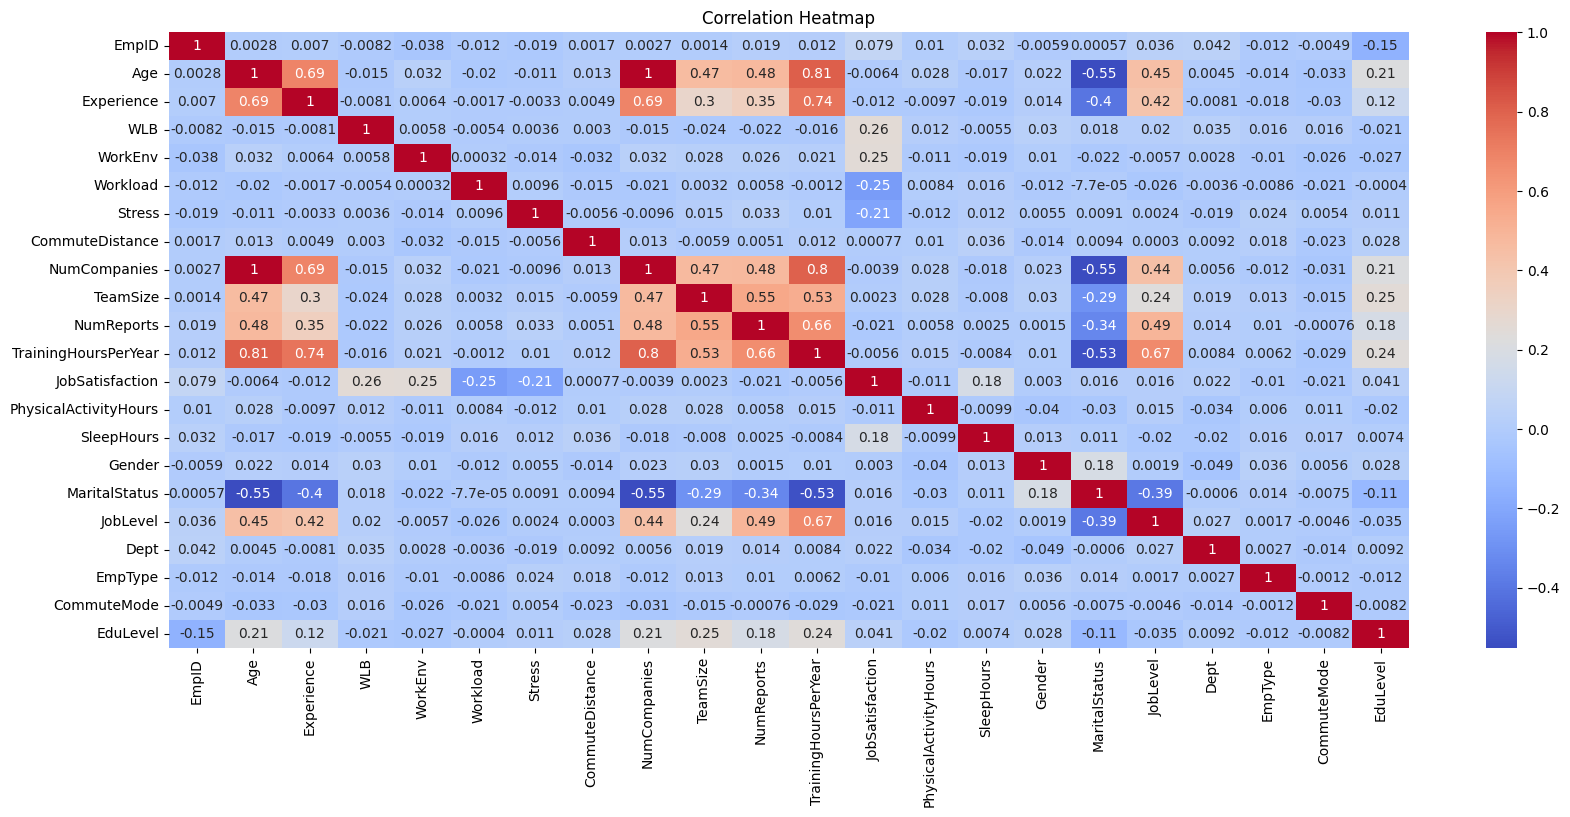

In [9]:
# Для просмотра корреляции попроще закодируем данные через LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder_le = LabelEncoder()
for each in categorical_features:
    category_df[each] = encoder_le.fit_transform(category_df[each])
    category_df_check=encoder_le.classes_

numeric_df = df.select_dtypes(include='number')
new_df_cor =pd.merge(numeric_df, category_df,  left_index=True, right_index=True)
new_df_cor.head()

# Кореляция переменных
plt.figure(figsize=(20, 8))
sns.heatmap(new_df_cor.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
# Разделение данных на набор зависимых переменных и метку
data = new_df.drop(["TrainingHoursPerYear"],axis=1)
target = new_df["TrainingHoursPerYear"]

Количество уникальных:
 79

Проверка распределения целевой метки:
 TrainingHoursPerYear
10.0    104
10.5     98
20.0     55
20.5     85
21.0    120
       ... 
62.5     21
63.0     11
63.5     11
64.0     13
64.5      5
Name: TrainingHoursPerYear, Length: 79, dtype: int64


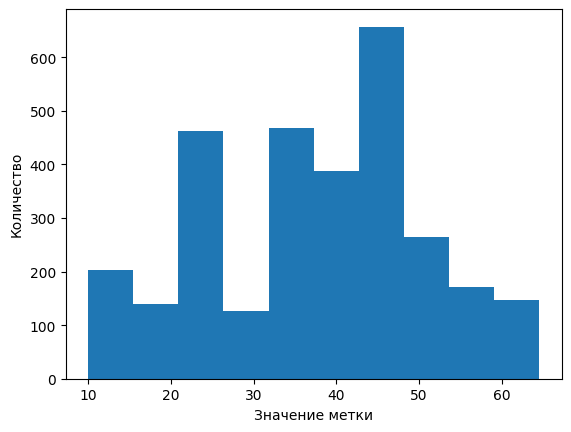

In [11]:
# Убираем бесполезные переменные
X=data.drop(["EmpID","CommuteDistance","NumCompanies"],axis=1)
Y=target

# Проверка распределения целевой метки
kol_target=Y.nunique()
print('Количество уникальных:\n',kol_target)
result_target = new_df.groupby('TrainingHoursPerYear', observed=False)['TrainingHoursPerYear'].count()
print('\nПроверка распределения целевой метки:\n',result_target)
plt.hist(target,bins=10)
plt.xlabel('Значение метки')
plt.ylabel('Количество')
plt.title('')
plt.show()

#  Регрессоры

MAE: 0.5273
MSE: 0.4712
R²: 0.9974


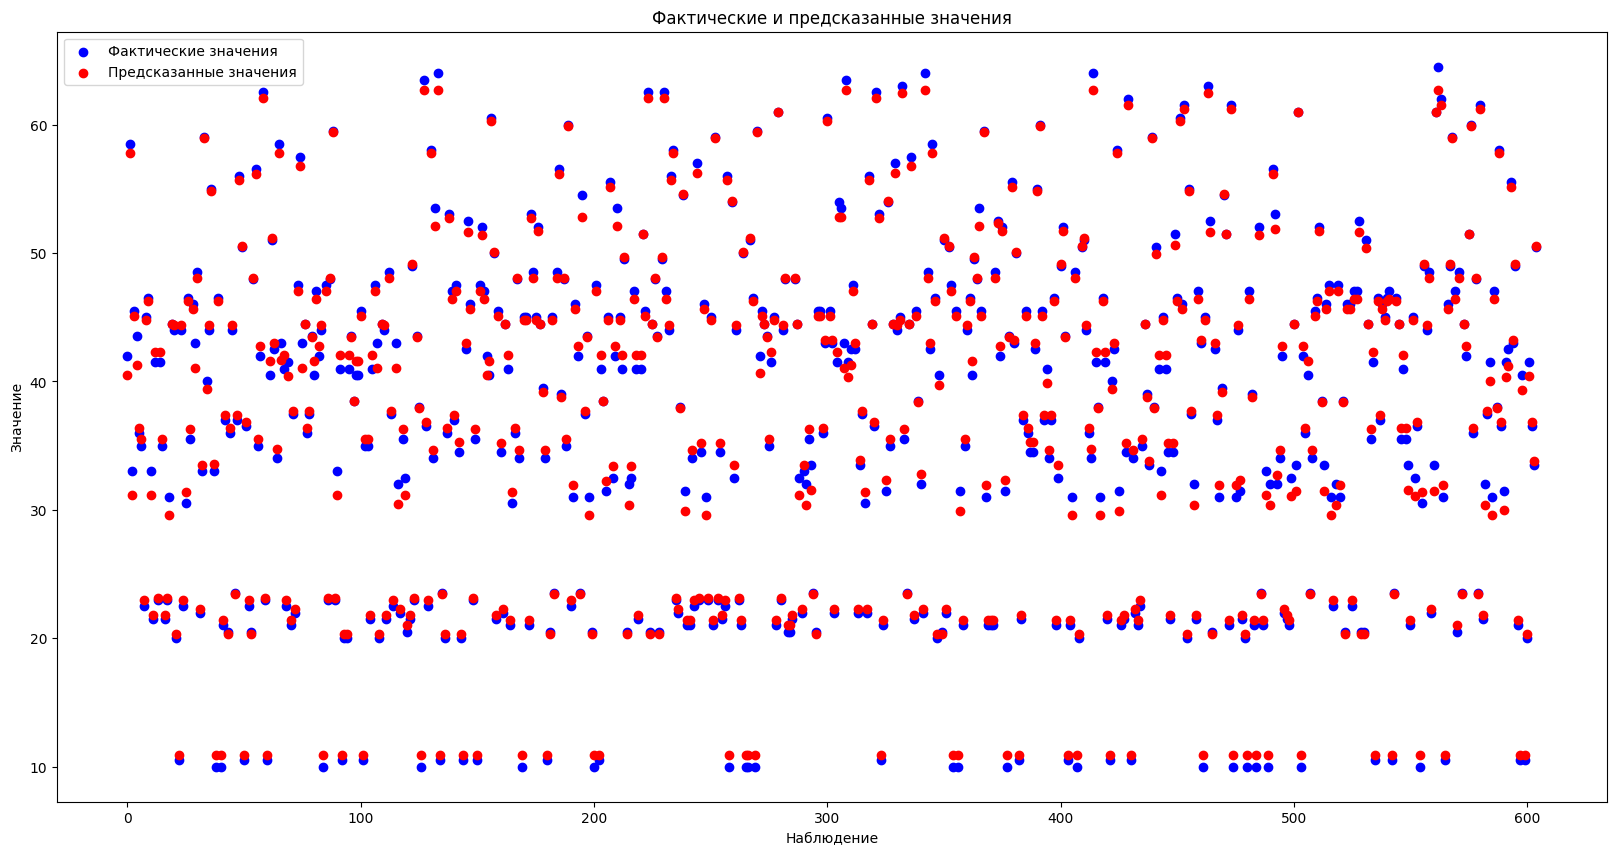

In [12]:
# Градиентный бустинг
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=43,stratify=Y)

# Создание и обучение модели Gradient Boosting Regressor
GBR_model = GradientBoostingRegressor(max_depth = 2,n_estimators = 50) # параметры
GBR_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
GBR_y_pred = GBR_model.predict(X_test)

# Вычисление метрик
GBR_mae = mean_absolute_error(y_test, GBR_y_pred)
GBR_mse = mean_squared_error(y_test, GBR_y_pred)
GBR_r2 = r2_score(y_test, GBR_y_pred)

print(f'MAE: {GBR_mae:.4f}') # средняя абсолютная ошибка
print(f'MSE: {GBR_mse:.4f}') # среднюю квадратическую ошибк
print(f'R²: {GBR_r2:.4f}') # коэффициент детерминации

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(20, 10))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(GBR_y_pred)), GBR_y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 306
[LightGBM] [Info] Number of data points in the train set: 2420, number of used features: 43
[LightGBM] [Info] Start training from score 37.311777
MAE: 0.0745529841557919
MSE: 0.014615850559726968
R²: 0.9999205633444693


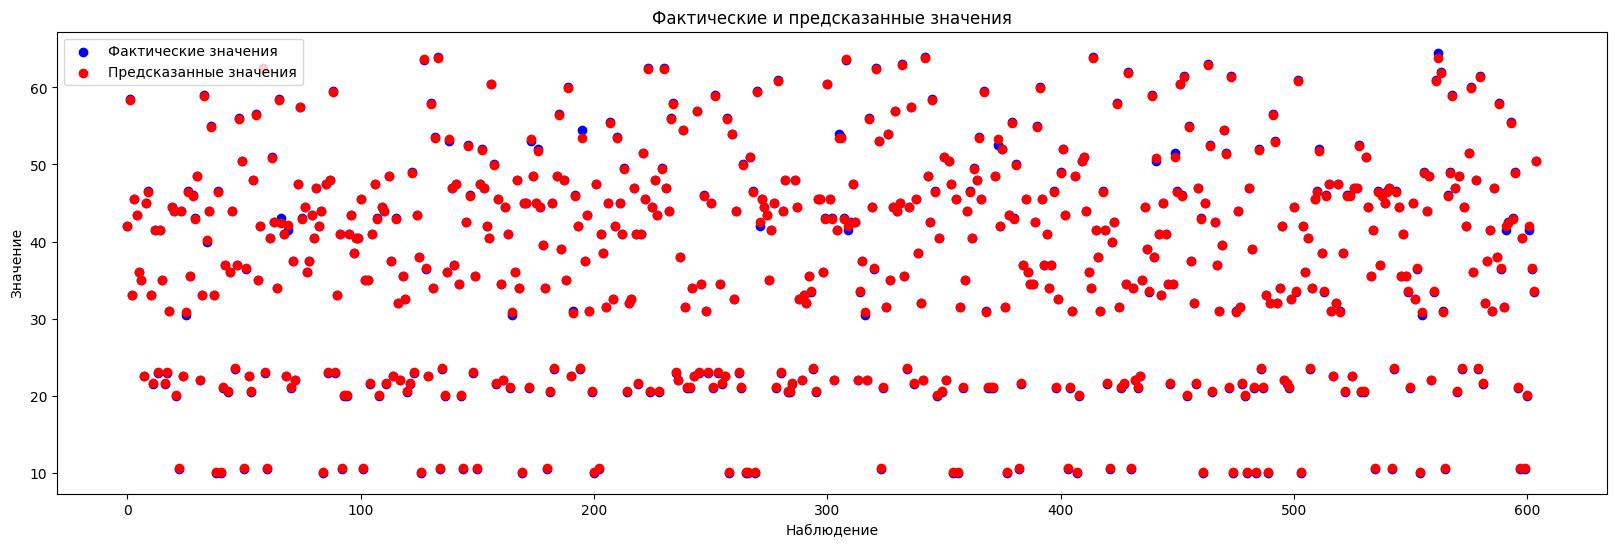

In [13]:
# Регрессор Light GBM
from lightgbm import LGBMRegressor

# Создание и обучение модели LGBMRegressor
LGBMR_model = LGBMRegressor(max_depth=-1,n_estimators=50,force_col_wise='true')
LGBMR_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
LGBMR_y_pred = LGBMR_model.predict(X_test)

# Вычисление метрик
LGBMR_mae = mean_absolute_error(y_test, LGBMR_y_pred)
LGBMR_mse = mean_squared_error(y_test, LGBMR_y_pred)
LGBMR_r2 = r2_score(y_test, LGBMR_y_pred)

print(f'MAE: {LGBMR_mae}')
print(f'MSE: {LGBMR_mse}')
print(f'R²: {LGBMR_r2}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(20, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(LGBMR_y_pred)), LGBMR_y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()


MAE: 0.12065929223683254
MSE: 0.028245833504568073
R²: 0.9998464848462216


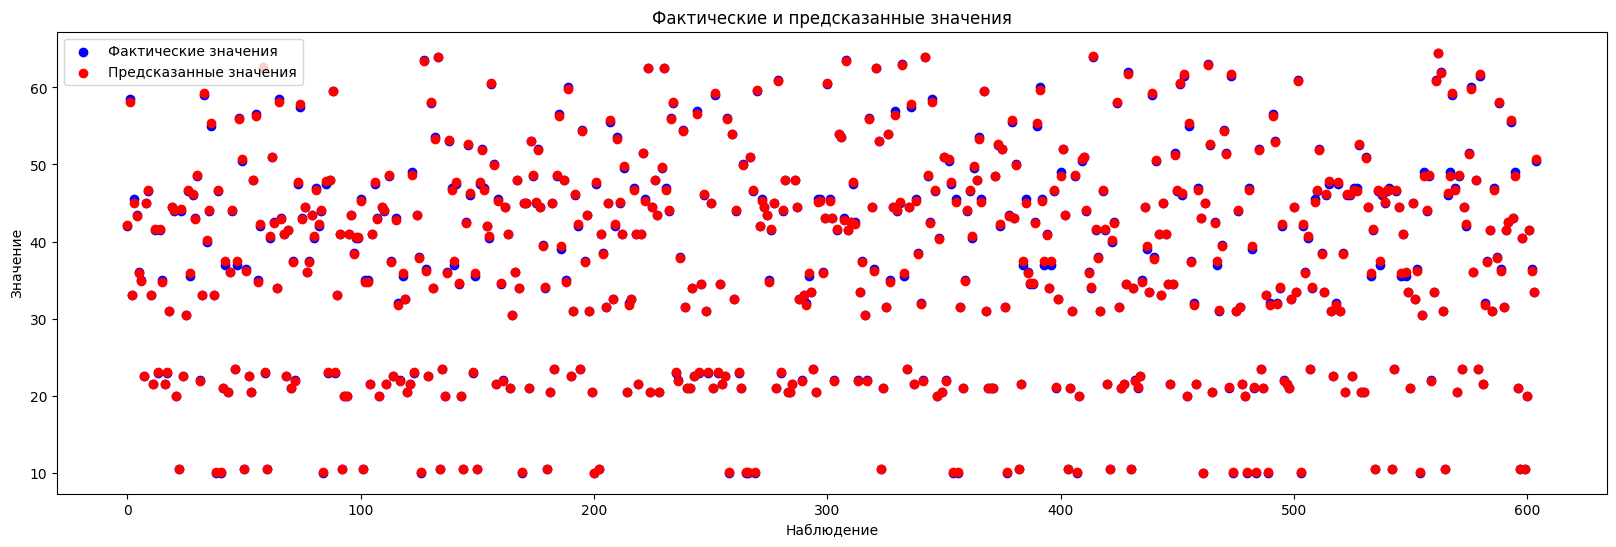

In [14]:
# XGBoost - Экстремальный градиентный бустинг.
from xgboost import XGBRegressor

# Определение модели
XGB_model = XGBRegressor(max_depth=3, n_estimators=50)
XGB_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
XGB_y_pred = XGB_model.predict(X_test)

# Вычисление метрик
XGB_mae = mean_absolute_error(y_test, XGB_y_pred)
XGB_mse = mean_squared_error(y_test, XGB_y_pred)
XGB_r2 = r2_score(y_test, XGB_y_pred)

print(f'MAE: {XGB_mae}')
print(f'MSE: {XGB_mse}')
print(f'R²: {XGB_r2}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(20, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(XGB_y_pred)), XGB_y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()


MAE: 0.5505877743665303
MSE: 0.4823776470019144
R²: 0.9973782937350117


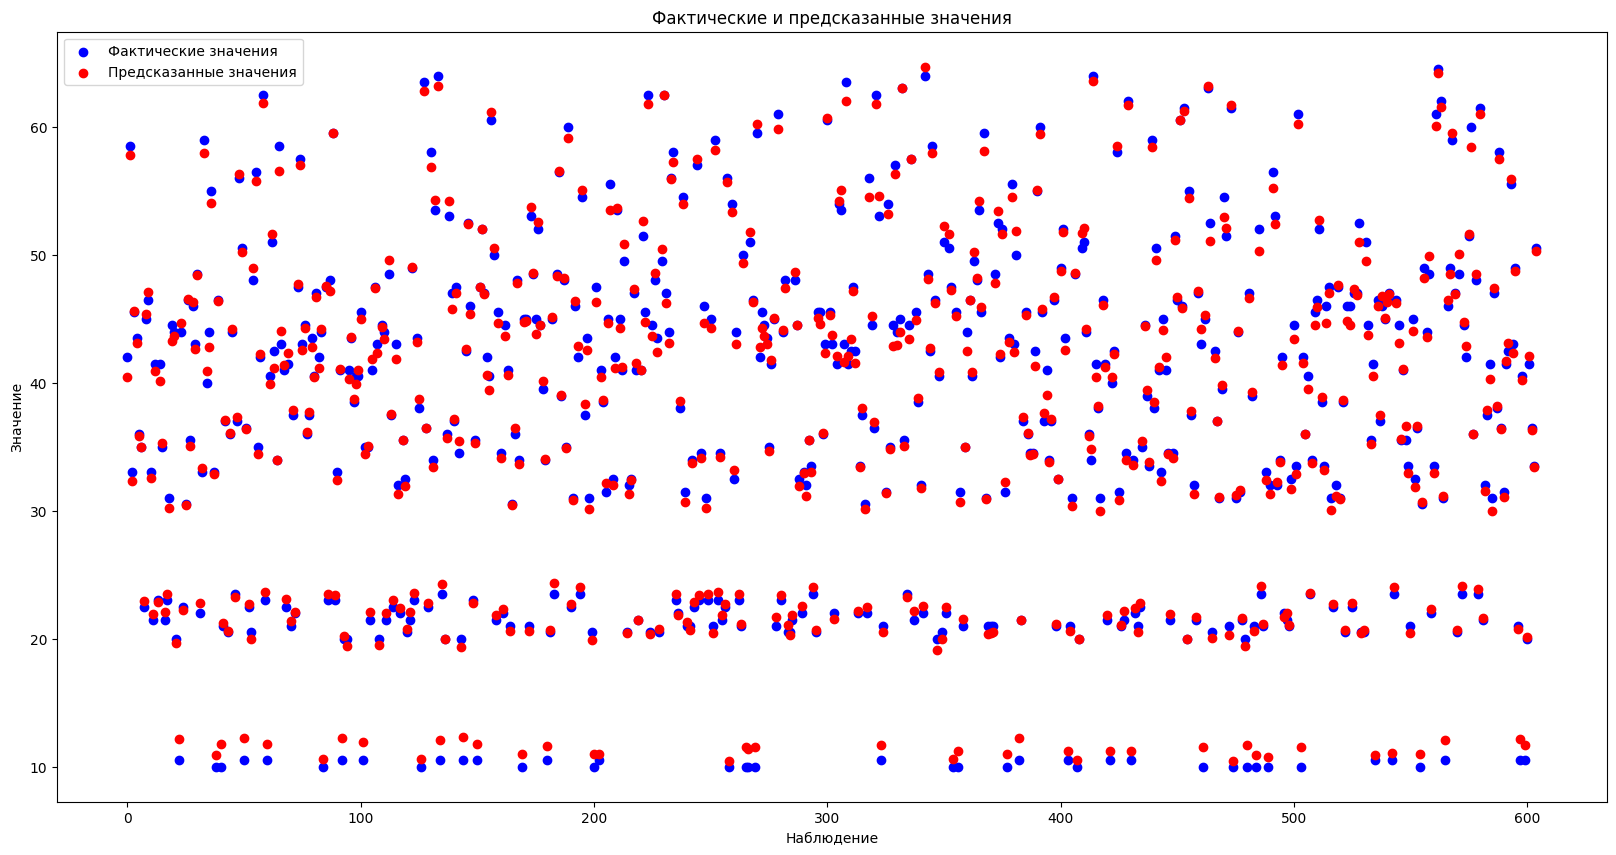

In [15]:
#Гребневая регрессия (L2-регуляризацией)
from sklearn.linear_model import RidgeCV
L2_model = RidgeCV(alphas=10.0) #0.1, 1.0, 10.0
L2_model.fit(X_train, y_train)

#Предсказание на тестовой выборке
L2_y_pred =L2_model.predict(X_test)

# Вычисление метрик
L2_mae = mean_absolute_error(y_test, L2_y_pred)
L2_mse = mean_squared_error(y_test, L2_y_pred)
L2_r2 = r2_score(y_test, L2_y_pred)

print(f'MAE: {L2_mae}')
print(f'MSE: {L2_mse}')
print(f'R²: {L2_r2}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(20, 10))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(L2_y_pred)), L2_y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

MAE: 0.8707722519980082
MSE: 1.2138919271751856
R²: 0.9934025382596527


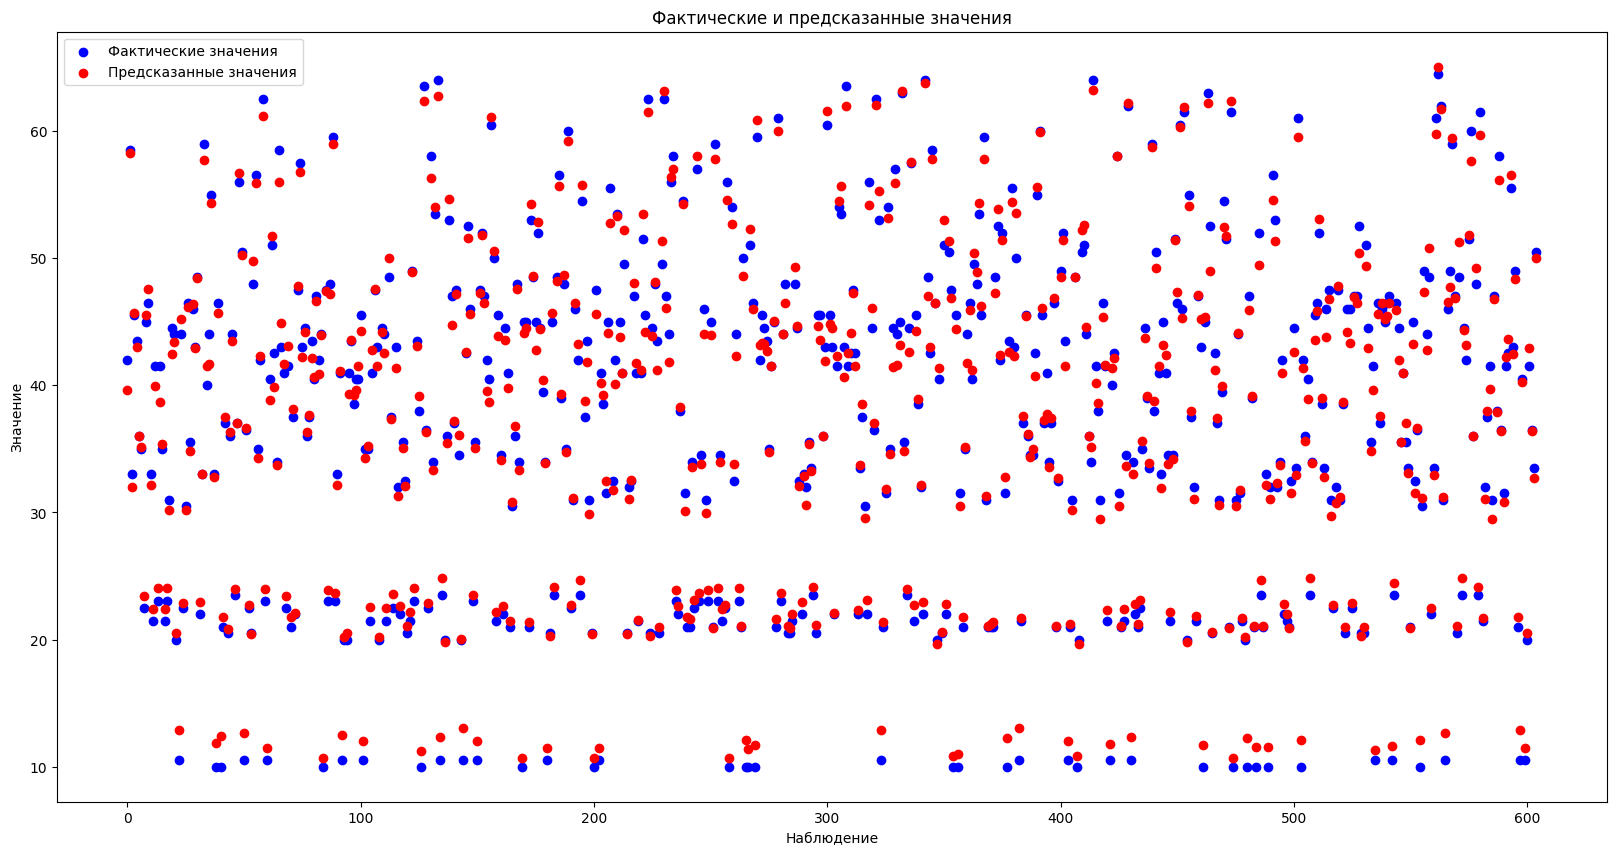

In [16]:
# Регрессия LASSO (L1-регуляризация)
from sklearn.linear_model import Lasso

# Создание и обучение модели регрессии Lasso
L1_model = Lasso(alpha=0.1)  # Здесь alpha - гиперпараметр регуляризации L1
L1_model.fit(X_train, y_train)

#Предсказание на тестовой выборке
L1_y_pred = L1_model.predict(X_test)

# Вычисление метрик
L1_mae = mean_absolute_error(y_test, L1_y_pred)
L1_mse = mean_squared_error(y_test, L1_y_pred)
L1_r2 = r2_score(y_test, L1_y_pred)

print(f'MAE: {L1_mae}')
print(f'MSE: {L1_mse}')
print(f'R²: {L1_r2}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(20, 10))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(L1_y_pred)), L1_y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

In [17]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


MAE: 0.5799464946636707
MSE: 0.5993173647469902
R²: 0.9967427303075941


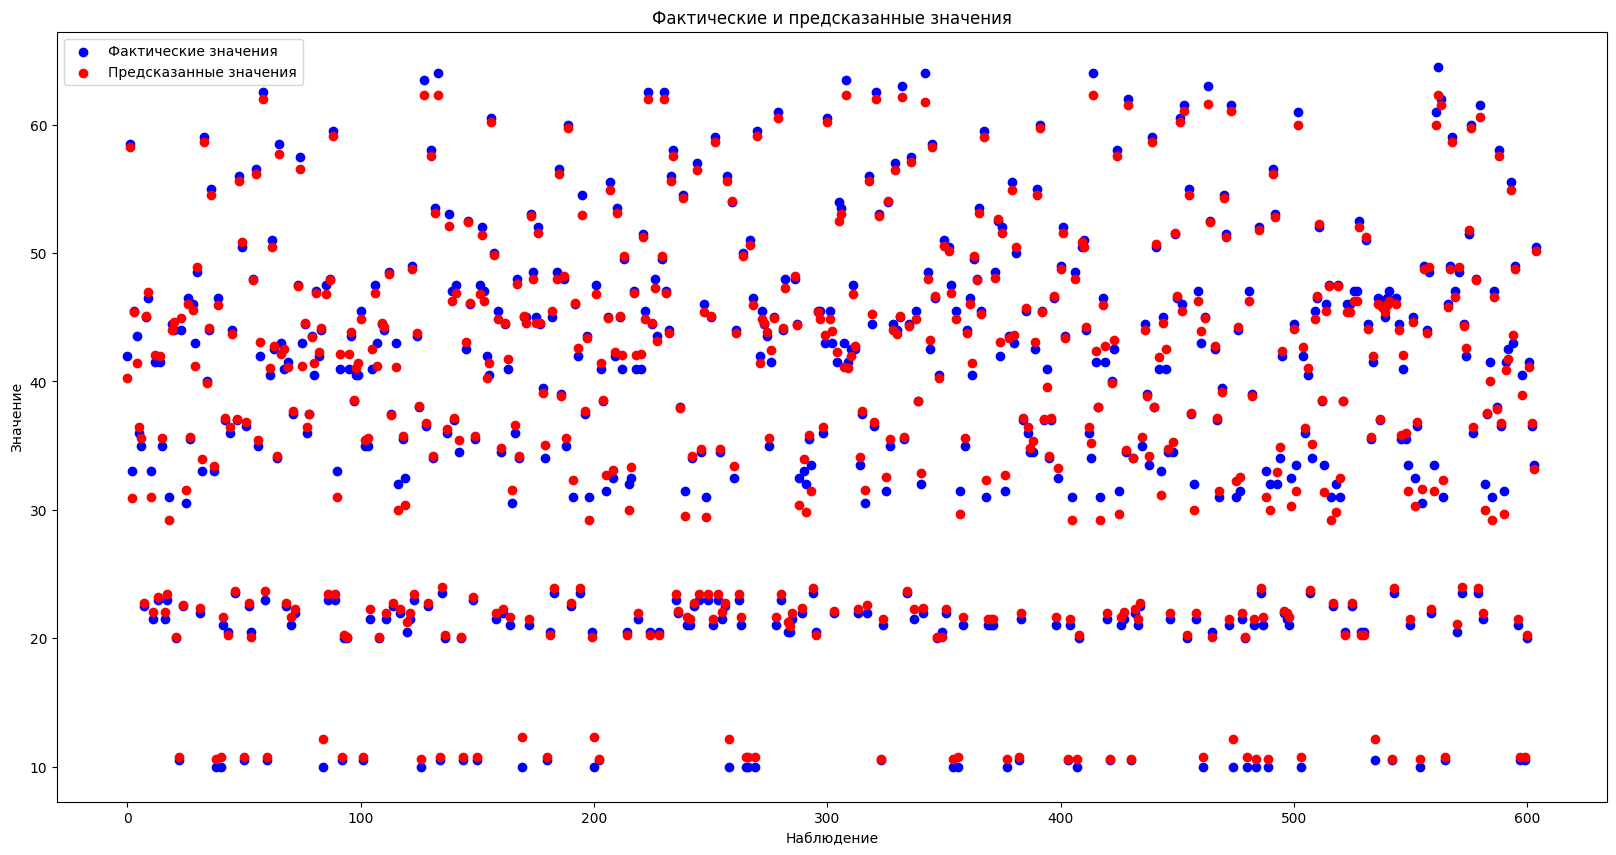

In [18]:
from catboost import CatBoostRegressor

# Создание и обучение модели CatBoost
CB_model = CatBoostRegressor(iterations=100, learning_rate=0.05, depth=3, random_state=55, verbose=0)
CB_model.fit(X_train, y_train)

#Предсказание на тестовой выборке
CB_y_pred = CB_model.predict(X_test)

# Вычисление метрик
CB_mae = mean_absolute_error(y_test, CB_y_pred)
CB_mse = mean_squared_error(y_test, CB_y_pred)
CB_r2 = r2_score(y_test, CB_y_pred)

print(f'MAE: {CB_mae}')
print(f'MSE: {CB_mse}')
print(f'R²: {CB_r2}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(20, 10))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(CB_y_pred)), CB_y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

In [19]:
# Сравнение метрик качества моделей
print(f'Сравнение метрик качества моделей:')
results_metrics = pd.DataFrame([
  ['Градиентный бустинг XGBoost', GBR_mae,GBR_mse,GBR_r2],
  ['Light_GBM', LGBMR_mae,LGBMR_mse,LGBMR_r2],
  ['Экстремальный градиентный бустинг XGBoost', XGB_mae,XGB_mse,XGB_r2],
  ['Гребневая регрессия L2', L2_mae,L2_mse,L2_r2],
  ['Регрессия LASSO L1', L1_mae,L1_mse,L1_r2],
  ['CatBoost', CB_mae,CB_mse,CB_r2]],
  columns=['model','mae', 'mse','r2',])
display(results_metrics)


Сравнение метрик качества моделей:


,model,mae,mse,r2
0,Градиентный бустинг XGBoost,0.527297,0.471183,0.997439
1,Light_GBM,0.074553,0.014616,0.999921
2,Экстремальный градиентный бустинг XGBoost,0.120659,0.028246,0.999846
3,Гребневая регрессия L2,0.550588,0.482378,0.997378
4,Регрессия LASSO L1,0.870772,1.213892,0.993403
5,CatBoost,0.579946,0.599317,0.996743


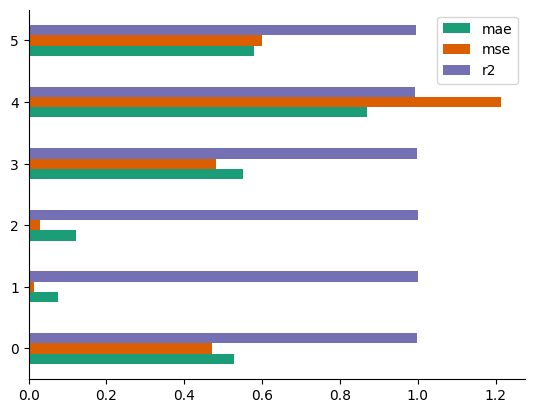

In [20]:
# Визуализируем ошибки
from matplotlib import pyplot as plt
import seaborn as sns
results_metrics.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#По результатам анализа делаю вывод, что ансамблевый алгоритм машинного обучения "*Light Gradient Boosted Machine*" является самым удачным выбором для решения поставленой задачи.